## Pré-Requis

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

# Partie 1 Analyse exploratoire

## Analyse exploratoire

### Résultat attendu  

### Le notebook template avec la partie "Analyse exploratoire” complétée.

#### Import des datas

In [31]:
building_consumption = pd.read_csv(r"C:\Users\ethan\OpenClassroom\Projet_2\Projet\Anticipez_les_besoins_\Fichiers\2016_Building_Energy_Benchmarking.csv")

#### Visualisation des datas

In [32]:
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


## Terminer l'analyse exploratoire

### A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

#### Informations

In [33]:
display(building_consumption.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

None

In [34]:
cat_cols = building_consumption.select_dtypes(include="object").columns
building_consumption[cat_cols] = building_consumption[cat_cols].astype("category")
display(building_consumption.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   OSEBuildingID                    3376 non-null   int64   
 1   DataYear                         3376 non-null   int64   
 2   BuildingType                     3376 non-null   category
 3   PrimaryPropertyType              3376 non-null   category
 4   PropertyName                     3376 non-null   category
 5   Address                          3376 non-null   category
 6   City                             3376 non-null   category
 7   State                            3376 non-null   category
 8   ZipCode                          3360 non-null   float64 
 9   TaxParcelIdentificationNumber    3376 non-null   category
 10  CouncilDistrictCode              3376 non-null   int64   
 11  Neighborhood                     3376 non-null   category
 12  Latitu

None

On supprime les colonnes inutiles

In [35]:
print("Valeurs uniques dans DataYear :", building_consumption["DataYear"].unique())
building_consumption = building_consumption.drop(columns=["DataYear"])
building_consumption = building_consumption.drop(columns=["City","State","ENERGYSTARScore"])

Valeurs uniques dans DataYear : [2016]


#### Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas

In [36]:
print("\nProportion de valeurs manquantes par colonne (%):")
print(((len(building_consumption) - building_consumption.apply(lambda s: s.value_counts().sum())) / len(building_consumption) * 100).sort_values(ascending=False))


Proportion de valeurs manquantes par colonne (%):
Comments                           100.000000
Outlier                             99.052133
YearsENERGYSTARCertified            96.475118
ThirdLargestPropertyUseType         82.345972
ThirdLargestPropertyUseTypeGFA      82.345972
SecondLargestPropertyUseTypeGFA     50.266588
SecondLargestPropertyUseType        50.266588
LargestPropertyUseType               0.592417
LargestPropertyUseTypeGFA            0.592417
ZipCode                              0.473934
Electricity(kBtu)                    0.266588
SteamUse(kBtu)                       0.266588
SourceEUIWN(kBtu/sf)                 0.266588
SourceEUI(kBtu/sf)                   0.266588
NaturalGas(therms)                   0.266588
NaturalGas(kBtu)                     0.266588
TotalGHGEmissions                    0.266588
Electricity(kWh)                     0.266588
GHGEmissionsIntensity                0.266588
ListOfAllPropertyUseTypes            0.266588
NumberofBuildings            

Supprimer les non residentiels

In [37]:
print(sorted(building_consumption["PrimaryPropertyType"].dropna().unique()))

['Distribution Center', 'High-Rise Multifamily', 'Hospital', 'Hotel', 'K-12 School', 'Laboratory', 'Large Office', 'Low-Rise Multifamily', 'Medical Office', 'Mid-Rise Multifamily', 'Mixed Use Property', 'Office', 'Other', 'Refrigerated Warehouse', 'Residence Hall', 'Restaurant', 'Retail Store', 'Self-Storage Facility', 'Senior Care Community', 'Small- and Mid-Sized Office', 'Supermarket / Grocery Store', 'University', 'Warehouse', 'Worship Facility']


In [38]:
# Liste des types purement résidentiels à exclure
types_residentiels = [
    "High-Rise Multifamily",
    "Mid-Rise Multifamily",
    "Low-Rise Multifamily",
    "Residence Hall",
    "Senior Care Community"
]

# Suppression des lignes correspondantes
idx_res = building_consumption.index[building_consumption["PrimaryPropertyType"].isin(types_residentiels)]
building_consumption = building_consumption.drop(index=idx_res)

# Contrôle
print("Lignes restantes :", len(building_consumption))
print("Types restants :", building_consumption["PrimaryPropertyType"].value_counts().head(10))


Lignes restantes : 1652
Types restants : PrimaryPropertyType
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Name: count, dtype: int64


Suppresion des lignes considérées comme outliers

In [39]:
# Comptage avant
n_avant = len(building_consumption)

# Index des outliers marqués
idx_outliers = building_consumption.index[
    building_consumption["Outlier"].astype(str).str.contains("high outlier|low outlier", case=False, na=False)
]

# Option audit, conserver les lignes supprimées
df_outliers = building_consumption.loc[idx_outliers].copy()

# Suppression
building_consumption = building_consumption.drop(index=idx_outliers)

# Contrôle
print("Outliers supprimés :", len(idx_outliers), "; lignes restantes :", len(building_consumption), "; lignes avant :", n_avant)


Outliers supprimés : 16 ; lignes restantes : 1636 ; lignes avant : 1652


In [40]:
cols = [
    "Latitude", "Longitude", "YearBuilt", "SiteEUI(kBtu/sf)",
    "NumberofFloors","PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA",
    "SecondLargestPropertyUseTypeGFA"
]

# Quartiles et IQR
q1 = building_consumption[cols].quantile(0.25)
q3 = building_consumption[cols].quantile(0.75)
iqr = q3 - q1
lower = q1 - 3 * iqr
upper = q3 + 3 * iqr

# Lignes outliers si valeur < lower ou > upper sur au moins une colonne
is_low = building_consumption[cols].lt(lower, axis="columns")
is_high = building_consumption[cols].gt(upper, axis="columns")
outlier_mask = (is_low | is_high).any(axis=1)

# Suppression des lignes outliers
building_consumption = building_consumption.loc[~outlier_mask].copy()
print(building_consumption.columns.tolist())

['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


Suppression des colonnes très vides

In [41]:
to_drop = (building_consumption.isnull().mean() * 100 > 70).index[building_consumption.isnull().mean() * 100 > 90]
building_consumption = building_consumption.drop(columns=to_drop)
display(building_consumption.head())

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
5,9,Nonresidential COS,Other,West Precinct,810 Virginia St,98101.0,0660000560,7,DOWNTOWN,47.61623,...,12581712.0,0.00,2.160444e+06,7371434.0,47151.81641,4715182.0,False,Compliant,301.81,3.10
6,10,NonResidential,Hotel,Camlin,1619 9th Avenue,98101.0,0660000825,7,DOWNTOWN,47.61390,...,6062767.5,0.00,8.239199e+05,2811215.0,29475.80078,2947580.0,False,Compliant,176.14,2.12


In [42]:
print("Colonnes supprimées car > 90 % de NaN :", to_drop)

Colonnes supprimées car > 90 % de NaN : Index(['YearsENERGYSTARCertified', 'Comments', 'Outlier'], dtype='object')


In [43]:

na = building_consumption.isna().sum().sort_values(ascending=False)
print(na[na>0])

ThirdLargestPropertyUseType        1135
ThirdLargestPropertyUseTypeGFA     1135
SecondLargestPropertyUseType        721
SecondLargestPropertyUseTypeGFA     721
ZipCode                              13
LargestPropertyUseTypeGFA             6
LargestPropertyUseType                6
SiteEUIWN(kBtu/sf)                    3
SiteEnergyUseWN(kBtu)                 3
Electricity(kWh)                      2
SteamUse(kBtu)                        2
Electricity(kBtu)                     2
SiteEnergyUse(kBtu)                   2
SourceEUIWN(kBtu/sf)                  2
SourceEUI(kBtu/sf)                    2
SiteEUI(kBtu/sf)                      2
NaturalGas(therms)                    2
NaturalGas(kBtu)                      2
TotalGHGEmissions                     2
GHGEmissionsIntensity                 2
NumberofBuildings                     2
ListOfAllPropertyUseTypes             2
dtype: int64


In [44]:
# Catégorie manquante = "None"
cols = ["SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]

for col in cols:
    building_consumption[col] = building_consumption[col].cat.add_categories("None")
    building_consumption[col] = building_consumption[col].fillna("None")

# Surface manquante = 0
building_consumption["SecondLargestPropertyUseTypeGFA"] = building_consumption["SecondLargestPropertyUseTypeGFA"].fillna(0)



# Surface manquante = 0
building_consumption["ThirdLargestPropertyUseTypeGFA"] = building_consumption["ThirdLargestPropertyUseTypeGFA"].fillna(0)


In [45]:
na = building_consumption.isna().sum().sort_values(ascending=False)
print(na[na>0])

ZipCode                      13
LargestPropertyUseTypeGFA     6
LargestPropertyUseType        6
SiteEnergyUseWN(kBtu)         3
SiteEUIWN(kBtu/sf)            3
ListOfAllPropertyUseTypes     2
TotalGHGEmissions             2
NaturalGas(kBtu)              2
NaturalGas(therms)            2
Electricity(kBtu)             2
Electricity(kWh)              2
SteamUse(kBtu)                2
SiteEnergyUse(kBtu)           2
SourceEUIWN(kBtu/sf)          2
SourceEUI(kBtu/sf)            2
SiteEUI(kBtu/sf)              2
GHGEmissionsIntensity         2
NumberofBuildings             2
dtype: int64


In [46]:
mask = building_consumption["LargestPropertyUseType"].notna()
building_consumption = building_consumption.loc[mask].copy()

In [47]:
na = building_consumption.isna().sum().sort_values(ascending=False)
print(na[na>0])

ZipCode                  13
SiteEnergyUseWN(kBtu)     1
SiteEUIWN(kBtu/sf)        1
dtype: int64


In [48]:
mask = building_consumption["SiteEnergyUseWN(kBtu)"].notna()
building_consumption = building_consumption.loc[mask].copy()

In [49]:
na = building_consumption.isna().sum().sort_values(ascending=False)
print(na[na>0])

ZipCode    13
dtype: int64


In [50]:
m = building_consumption["ZipCode"].isna() | (building_consumption["ZipCode"] == "")
display(building_consumption.loc[m, ["Latitude", "Longitude"]])

,Latitude,Longitude
3360,47.70541,-122.32232
3361,47.59905,-122.29787
3362,47.69330,-122.37717
3363,47.72126,-122.29735
3364,47.67295,-122.39228
3366,47.63572,-122.37525
3368,47.60775,-122.30225
3369,47.56440,-122.27813
3370,47.54067,-122.37441
3371,47.56722,-122.31154


In [51]:
# Remplissage ciblé des 16 ZipCode manquants par index, avec contrôle des non appliqués
fixes = {
    3360: "98125",
    3363: "98125",
    3362: "98117",
    3364: "98107",
    3366: "98119",
    3368: "98122",
    3361: "98144",
    3372: "98104",
    3371: "98108",
    3369: "98118",
    3370: "98126",
    3374: "98108",
    3375: "98108",
}

maj = 0
non_applique = [] 

for i, z in fixes.items():
    if i not in building_consumption.index:
        non_applique.append((i, "index absent"))
        continue
    v = building_consumption.at[i, "ZipCode"]
    if pd.isna(v) or str(v).strip() == "":
        building_consumption.at[i, "ZipCode"] = z
        maj += 1
    else:
        non_applique.append((i, "déjà renseigné"))

print(f"Mises à jour appliquées: {maj}")
if non_applique:
    lst = ", ".join([f"{i} ({r})" for i, r in non_applique])
    print(f"Non appliquées: {len(non_applique)} éléments, détails: {lst}")
else:
    print("Tous les changements de la liste ont été appliqués")


Mises à jour appliquées: 13
Tous les changements de la liste ont été appliqués


C:\Users\ethan\AppData\Local\Temp\ipykernel_1600\3566122140.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98125' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  building_consumption.at[i, "ZipCode"] = z


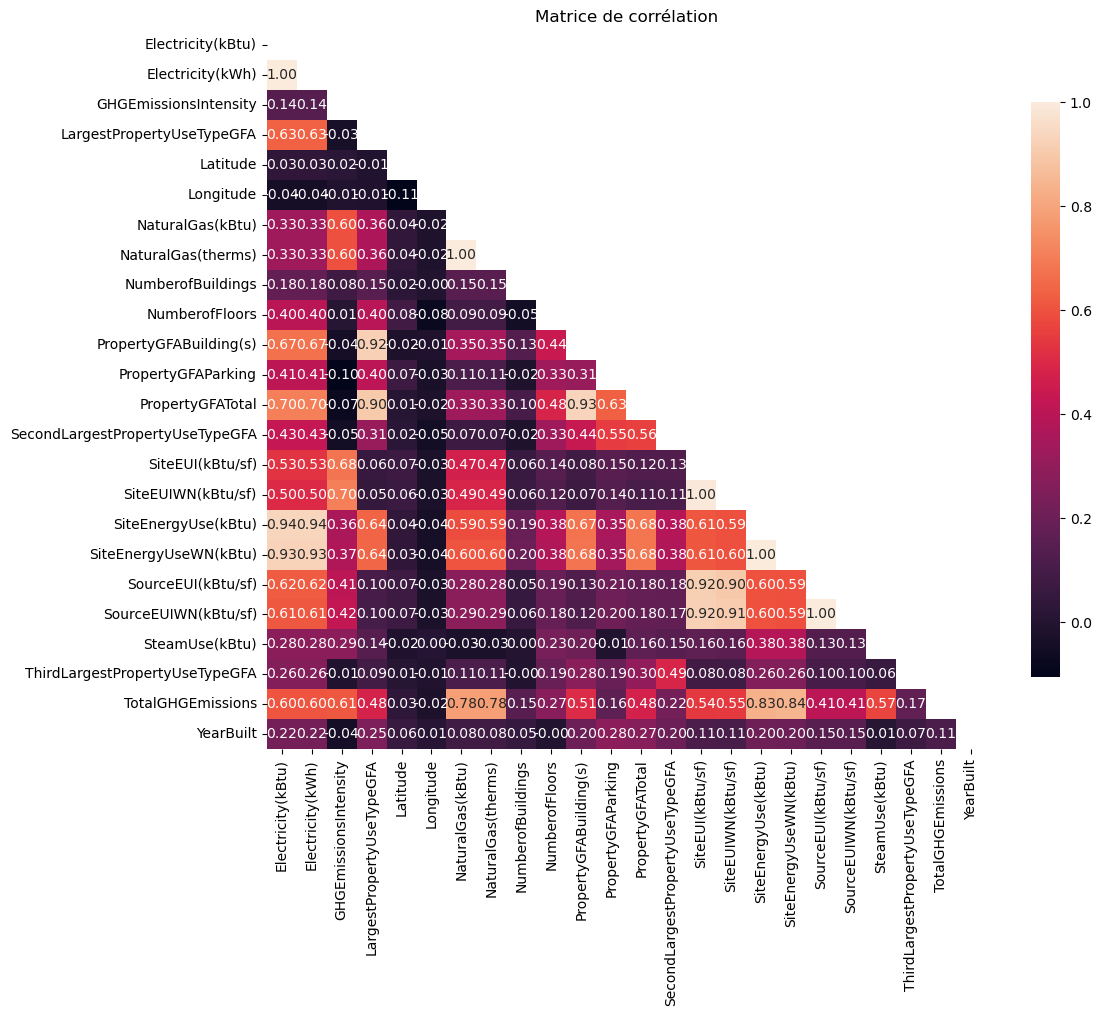

In [52]:
# Colonnes numériques pertinentes
cols_num = building_consumption.select_dtypes(include="number").columns.difference(
    ["OSEBuildingID", "ZipCode", "CouncilDistrictCode"]
)
cols_num = [c for c in cols_num if building_consumption[c].nunique(dropna=True) > 1]

# Matrice et heatmap
corr = building_consumption[cols_num].corr(method="pearson")
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

toutes les colonnes sont utiles pour faire le feature engineering, d'autres colonnes vont être crées et d'autres supprimées

In [154]:
building_consumption.to_csv(r"C:\Users\ethan\OpenClassroom\Projet_2\Projet\Anticipez_les_besoins_\Fichiers\data_etape_1_clean.csv", index=False, encoding="utf-8")